<a href="https://colab.research.google.com/github/annaprotsek/NM/blob/main/%D0%9B%D0%A013_%D0%9F%D1%80%D0%BE%D1%86%D0%B8%D0%BA_11%D0%B2_%D0%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 13.

#Метод Ейлера

Метод Ейлера:
x=1.6, y=4.6000
x=1.7, y=4.7637
x=1.8, y=4.9320
x=1.9, y=5.1047
x=2.0, y=5.2817
x=2.1, y=5.4628
x=2.2, y=5.6481
x=2.3, y=5.8374
x=2.4, y=6.0307
x=2.5, y=6.2282
x=2.6, y=6.4298


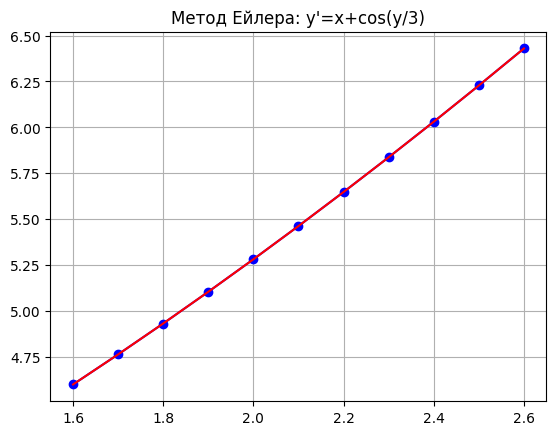

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Функція з умови
def f(x, y):
    # f(x, y) = x + cos(y / 3)
    return x + np.cos(y / 3)

# Початкові дані
a, b = 1.6, 2.6
h = 0.1
y0 = 4.6

n = int((b - a) / h)
x = np.array([a + i*h for i in range(n + 1)])

y = np.empty(n + 1)
y[0] = y0

# Метод Ейлера
for i in range(n):
    y[i + 1] = y[i] + f(x[i], y[i]) * h

y_rounded = np.round(y, 4)
print("Метод Ейлера:")
for i in range(n + 1):
    print(f"x={x[i]:.1f}, y={y_rounded[i]:.4f}")

plt.plot(x, y, marker='o', color="blue")
plt.plot(x, y, "-", color="red")
plt.grid()
plt.title("Метод Ейлера: y'=x+cos(y/3)")
plt.show()

In [2]:
#Додати перевірку odeint для першого завдання
import numpy as np
from scipy.integrate import odeint

def f_odeint(y, x):
    # f(x, y) = x + cos(y / 3)
    return x + np.cos(y / 3)

# Початкові дані
a, b = 1.6, 2.6
h = 0.1
y0 = 4.6

# Формування масиву x
n = int((b - a) / h)
x = np.array([a + i*h for i in range(n + 1)])

# Розв'язок за допомогою odeint
y_odeint = odeint(f_odeint, y0, x)[:, 0]
y_odeint_rounded = np.round(y_odeint, 4)

print(" Перевірка: odeint ")
print("x (точки оцінки) =", x)
print("y (odeint) =", y_odeint_rounded)

 Перевірка: odeint 
x (точки оцінки) = [1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6]
y (odeint) = [4.6    4.766  4.9364 5.111  5.2899 5.4728 5.6597 5.8506 6.0456 6.2447
 6.4479]


In [3]:
#додати перевірку solve_ivp для перешого завдання
import numpy as np
from scipy.integrate import solve_ivp

def f_solve_ivp(x, y):
    # f(x, y) = x + cos(y / 3)
    return x + np.cos(y / 3)

# Початкові дані
a, b = 1.6, 2.6
h = 0.1
y0 = 4.6

# Формування масиву x
n = int((b - a) / h)
x_eval = np.array([a + i*h for i in range(n + 1)])

# Розв'язок за допомогою solve_ivp
sol = solve_ivp(f_solve_ivp,
                t_span=(a, b),
                y0=[y0],
                t_eval=x_eval)

y_solve_ivp = sol.y[0]
y_solve_ivp_rounded = np.round(y_solve_ivp, 4)

print(" Перевірка: solve_ivp ")
print("x (точки оцінки) =", x_eval)
print("y (solve_ivp) =", y_solve_ivp_rounded)

 Перевірка: solve_ivp 
x (точки оцінки) = [1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6]
y (solve_ivp) = [4.6    4.766  4.9364 5.111  5.2899 5.4728 5.6597 5.8506 6.0456 6.2447
 6.4479]


#Метод Ейлера-Коші

Метод Ейлера-Коші:
x=1.6, y=4.6000
x=1.7, y=4.7660
x=1.8, y=4.9364
x=1.9, y=5.1111
x=2.0, y=5.2899
x=2.1, y=5.4729
x=2.2, y=5.6598
x=2.3, y=5.8508
x=2.4, y=6.0458
x=2.5, y=6.2449
x=2.6, y=6.4482


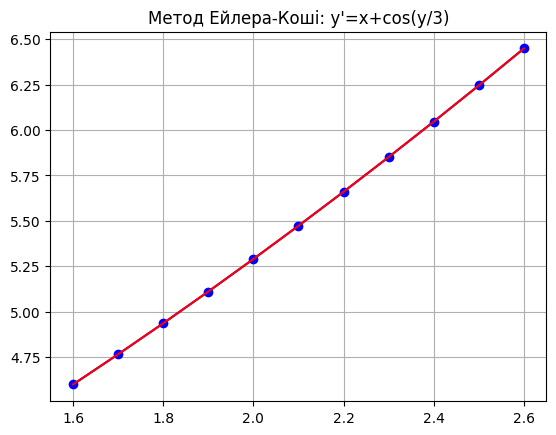

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    # f(x, y) = x + cos(y / 3)
    return x + np.cos(y / 3)

a, b = 1.6, 2.6
h = 0.1
y0 = 4.6

n = int((b - a) / h)
x = np.array([a + i*h for i in range(n + 1)])

y = np.empty(n + 1)
y[0] = y0

# Метод Ейлера-Коші
for i in range(n):
    k1 = f(x[i], y[i])              # f(x_i, y_i)
    y_pred = y[i] + h * k1          # Прогноз y_{i+1}^*
    k2 = f(x[i] + h, y_pred)        # f(x_{i+1}, y_{i+1}^*)
    y[i + 1] = y[i] + (h / 2) * (k1 + k2) # Корекція y_{i+1}

y_rounded = np.round(y, 4)
print("Метод Ейлера-Коші:")
for i in range(n + 1):
    print(f"x={x[i]:.1f}, y={y_rounded[i]:.4f}")

plt.plot(x, y, marker='o', color="blue")
plt.plot(x, y, "-", color="red")
plt.grid()
plt.title("Метод Ейлера-Коші: y'=x+cos(y/3)")
plt.show()

#Розв’язок диф. Рівняння за допомогою scipy.integrate import odeint

x= [1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6]
y= [4.6    4.766  4.9364 5.111  5.2899 5.4728 5.6597 5.8506 6.0456 6.2447
 6.4479]


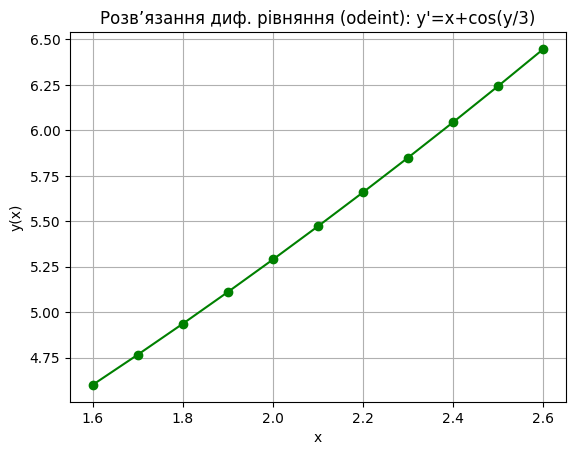

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(y, x):
    # f(x, y) = x + cos(y / 3)
    return x + np.cos(y / 3)

# Початкова умова
y0 = 4.6
a, b = 1.6, 2.6
h = 0.1
n = int((b - a) / h)

# Значення x
x = np.array([a + i*h for i in range(n + 1)]) # Коректний масив x

# Розв'язання ODE
y = odeint(model, y0, x)
y_rounded = np.around(y.flatten(), 4)

# Виведення результатів
print('x=', x)
print('y=', y_rounded)

# Побудова графіка результатів
plt.plot(x, y, marker='o', color='green')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння (odeint): y\'=x+cos(y/3)')
plt.grid()
plt.show()

#Використання scipy.integrate.solve_ivp
Функція solve_ivp є більш сучасним і гнучким способом розв'язання ODE, ніж odeint. Вона також дозволяє використовувати різні методи інтегрування.

x= [1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6]
y= [4.6    4.766  4.9364 5.111  5.2899 5.4728 5.6597 5.8506 6.0456 6.2447
 6.4479]


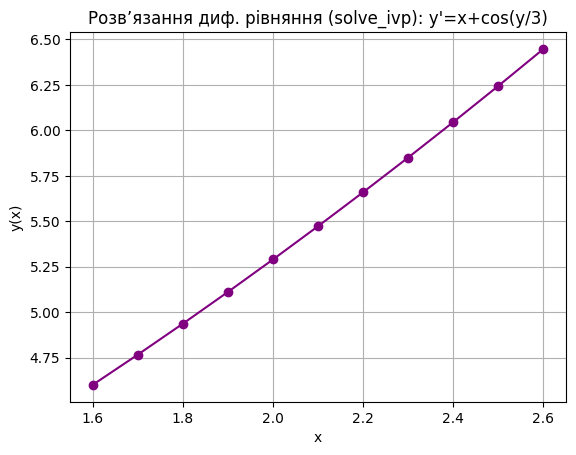

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(x, y):
    # f(x, y) = x + cos(y / 3)
    return x + np.cos(y / 3)

# Початкова умова
y0 = [4.6]
a, b = 1.6, 2.6
h = 0.1
n = int((b - a) / h)

# Значення x
x = np.array([a + i*h for i in range(n + 1)]) # Коректний масив x

# Розв'язання ODE
sol = solve_ivp(model, [a, b], y0, t_eval=x)

# Виведення результатів
print('x=', sol.t)
print('y=', np.around(sol.y[0], 4))

# Побудова графіка результатів
plt.plot(sol.t, sol.y[0], marker='o', color='purple')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння (solve_ivp): y\'=x+cos(y/3)')
plt.grid()
plt.show()